In [1]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from wordcloud import WordCloud
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

pd.set_option("display.precision", 2)

In [2]:
df_ingredient = pd.read_csv("../input/ingredient/ingredients data weigh v2.csv")
df_mergeWeightIngredient = pd.read_csv("../input/mergeweightingredient/mergeweightingredient_update.csv")
df_ingredient.head()
df_mergeWeightIngredient.head()

,name
0,330-350g - beef
1,2-Jan - chopped onion
2,One - egg
3,1/2 air - rice (or bread crumbs)
4,1.5 tablespoons - milk


**ANALISIS DATA CUISINE**

In [3]:
cuisine = df_ingredient['cuisine'].value_counts().rename_axis('name_cuisine').reset_index(name='total')
cuisine.to_csv('cuisine-with-total.csv',index=False)
print("Number of unique cuisine: " + str(len(cuisine)))

Number of unique cuisine: 3709


**ANALISIS DATA INGREDIENT**

In [4]:
ingredient = df_ingredient['ingredient'].value_counts().rename_axis('name_ingredient').reset_index(name='total')
ingredient.to_csv('ingredient-with-total.csv',index=False)
print("Number of unique ingredients: " + str(len(ingredient)))

Number of unique ingredients: 3598


In [5]:
ingredientWithPdSeries = pd.Series(df_ingredient.ingredient.unique())
print("Number of unique ingredients: " + str(len(ingredientWithPdSeries)))
for i in ingredientWithPdSeries[0:1]:
    dupes = ingredientWithPdSeries[ingredientWithPdSeries.str.contains(i)]
#     if len(dupes) > 1:
#         print(i, "->", str(dupes.unique().tolist()))

Number of unique ingredients: 3598


TOP 25 INGREDIENT 

<AxesSubplot:title={'center':'Most Common Ingredients'}, xlabel='ingredient'>

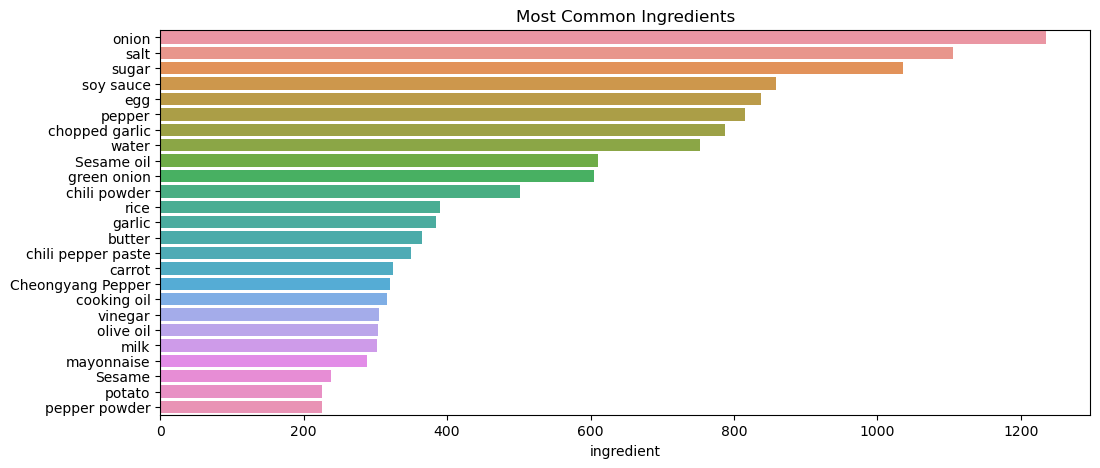

In [6]:
ingredient_frequencies = df_ingredient.ingredient.value_counts()
top_25 = ingredient_frequencies.head(25)
plt.figure(figsize=(12,5))
plt.title("Most Common Ingredients")
sns.barplot(x=top_25,y=top_25.index)

TOP INGREDIENT IN 25 CUISINE

**ANALISIS DATA WEIGHT**

In [7]:
#for ingredient in df_ingredient['weight']:
#    if 'tablespoon' in ingrediedf_weightMergeIngredient = df_ingredient['weight'].astype(str) +" 
df_weightMergeIngredient = df_ingredient['weight'].astype(str) +" - "+ df_ingredient["ingredient"]
df = pd.DataFrame(df_weightMergeIngredient, columns=['name'])
df.to_csv("mergeweightingredient.csv",index=False)

df_weightMergeIngredientWithTotal = df_weightMergeIngredient.value_counts().rename_axis('weight - ingredient').reset_index(name='total')
df_weightMergeIngredientWithTotal.to_csv('mergeweightingredient-with-total.csv',index=False)

ANALISIS FREQUENCY MERGE FILE

<AxesSubplot:title={'center':'Most Common merge weight ingredients'}>

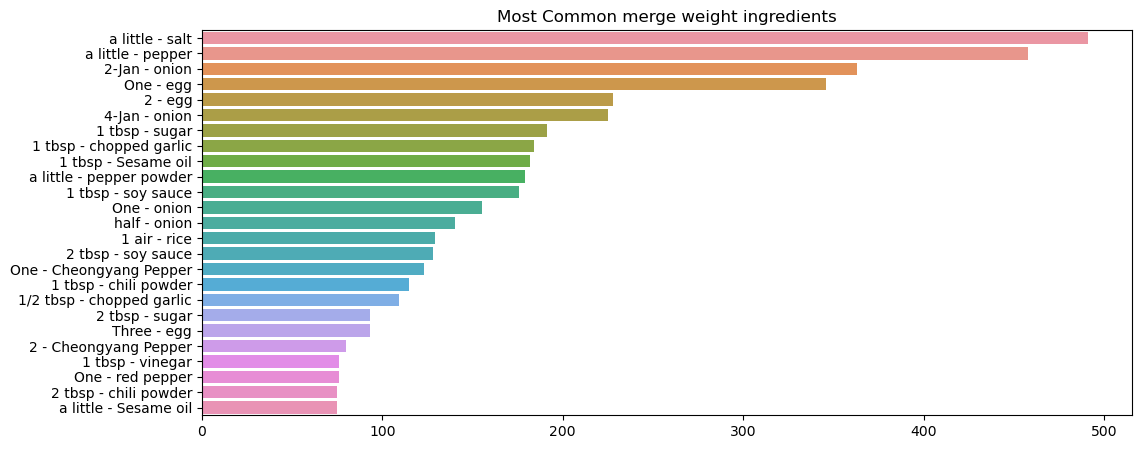

In [8]:
weight_ingredient_frequencies = df_weightMergeIngredient.value_counts()
top_25 = weight_ingredient_frequencies.head(25)
plt.figure(figsize=(12,5))
plt.title("Most Common merge weight ingredients")
sns.barplot(x=top_25,y=top_25.index)

In [9]:
def convertTablespoon(ingredientName, weight, find):
    if "water" in ingredientName.lower():
        rumus = 14.79
    elif "milk" in ingredientName.lower() or "whipped cream" in ingredientName.lower() or "sour cream" in ingredientName.lower() or "yogurt" in ingredientName.lower() :
        rumus = 15.23 
    elif "oil" in ingredientName.lower() or "butter" in ingredientName.lower() or "margarine" in ingredientName.lower() or "mayonnaise" in ingredientName.lower() :
        rumus = 13.01
    elif "flour" in ingredientName.lower():
        rumus = 7.8222
    elif "sugar" in ingredientName.lower() or "honey" in ingredientName.lower() or ingredientName.lower() == "corn syrup" or "nutella" in ingredientName.lower():
        if "tsuyu" not in ingredientName.lower():
            rumus = 12.5 
        else :
            return "tidak terdaftar dalam rumus"
    elif "soy sauce" in ingredientName.lower():
        if "tzuyu" not in ingredientName.lower() and "tsuyu" not in ingredientName.lower():
            rumus = 16.56
        else :
            return "tidak terdaftar dalam rumus"
    elif "chili powder" in ingredientName.lower():
        rumus = 5.91
    elif "vinegar" in ingredientName.lower() or "lemon juice" in ingredientName.lower():
        if "dubanjang" not in ingredientName.lower() and "[mixed vinegar]" not in ingredientName.lower() and "[unpickled seasoning]" not in ingredientName.lower() and "[cold vegetable seasoning]" not in ingredientName.lower():
            rumus = 14.37
        else :
            return "tidak terdaftar dalam rumus"
    elif "cooking wine" in ingredientName.lower():
        rumus = 14.7
    else :
        return "tidak terdaftar dalam rumus"
    
    if len(find) == 1:
        gram = rumus * float(find[0])
        gramString = str(gram) + " g"
    elif len(find) == 2:
        if "/" in weight :
            kali = int(find[0]) / int(find[1])
            gram = rumus * float(kali)
            gramString = str(gram) + " g"
        elif "-" in i :
            gram1 = rumus * float(find[0])
            gram2 = rumus * float(find[1])
            gramString = str(gram1)+"-"+str(gram2) + " g"
        elif i == "(thick) 4 tbsp (thin) 6 tbsp" :
            gram1 = rumus * float(find[0])
            gram2 = rumus * float(find[1])
            gramString = "(thick) "+ str(gram1)+" g (thin) "+ str(gram2)+" g"
        elif weight == "5 to 10 tablespoons" :
            gram1 = rumus * 5
            gram2 = rumus * 10
            gramString = str(gram1) + " g to "+str(gram2)+" g"
        else:
            gramString = "not in - and / from find 2"
    elif len(find) == 3:
        if "/" in weight and "to" not in weight :
            bagi = float(find[1]) / float(find[2])
            res = float(find[0]) + bagi
            gram = rumus * float(res)
            gramString = str(gram) + " g"
        elif "to" in weight :
            gram1 = rumus * 0.5
            gram2 = rumus * float(find[2])
            gramString = str(gram1) + " g to "+str(gram2)+" g" 
        else:
            gramString = "not in / from find 3"
    elif len(find)==0 and"half" in i:
        gram = rumus * 0.5
        gramString = str(gram) + " g"
    elif len(find)==0 and "two tablespoon" in weight:
        gram = rumus * 2
        gramString = str(gram) + " g"
    elif len(find)==0 and "three tablespoon" in weight:
        gram = rumus * 3
        gramString = str(gram) + " g"
    elif "water" in ingredientName.lower() or "flour" in ingredientName.lower() or "chili powder" in ingredientName.lower() or "cooking wine" in ingredientName.lower():
        gramString = "weight noting to convert"
    elif "milk" in ingredientName.lower() or "whipped cream" in ingredientName.lower() or "sour cream" in ingredientName.lower() or "yogurt" in ingredientName.lower() :
        gramString = "weight noting to convert"
    elif "oil" in ingredientName.lower() or "butter" in ingredientName.lower() or "margarine" in ingredientName.lower() or "mayonnaise" in ingredientName.lower() :
        gramString = "weight noting to convert"
    elif "sugar" in ingredientName.lower() or "honey" in ingredientName.lower() or ingredientName.lower() == "corn syrup" or "nutella" in ingredientName.lower():
        if "tsuyu" not in ingredientName.lower():
            gramString = "weight noting to convert"
    elif "soy sauce" in ingredientName.lower():
        if "tzuyu" not in ingredientName.lower() and "tsuyu" not in ingredientName.lower():
            gramString = "weight noting to convert"
    elif "vinegar" in ingredientName.lower() or "lemon juice" in ingredientName.lower():
        if "dubanjang" not in ingredientName.lower() and "[mixed vinegar]" not in ingredientName.lower() and "[unpickled seasoning]" not in ingredientName.lower() and "[cold vegetable seasoning]" not in ingredientName.lower():
            gramString = "weight noting to convert"
    else:
        gramString = "tidak terdaftar dalam rumus"
    return gramString

In [10]:
index = 0
convert=[]
tablespoon=[]
for i in df_ingredient['weight']:
    if 'tbsp' in i or 'tables' in i :
        find = re.findall(r"[+]?\d*\.?\d+|\d+", i)
        
#         ingredientName = df_ingredient["ingredient"][index]
#         if len(find) == 3 :
#             if "water" in ingredientName.lower() or "milk" in ingredientName.lower() or "oil" in ingredientName.lower() or "flour" in ingredientName.lower() or "sugar" in ingredientName.lower():
#                 print(find, "->", i, ingredientName)
                
        gramString = convertTablespoon(df_ingredient["ingredient"][index], i, find)
        
        if gramString == "tidak terdaftar dalam rumus" or gramString == "not in - and / from find 2" or gramString == "not in / from find 3":
            convert.append(i)
        else:
            convert.append(gramString)
        tablespoon.append(i+" -> "+gramString+" -> "+df_ingredient["ingredient"][index])
    else :
        convert.append(i)
        tablespoon.append("")
    index+=1
print(len(tablespoon))
df_convert = pd.DataFrame(convert)
df_tablespoon = pd.DataFrame(tablespoon)

df_ingredient["weight-after-convert"] = df_convert
df_ingredient["tablespoon"]=df_tablespoon

df_ingredient["tablespoon"].value_counts().rename_axis("name").reset_index(name="total").to_csv("tablespoon.csv",index=False)
df_ingredient.to_csv("ingredient_v1.csv", index=False)

32652


## ANALISA DATA 

1. CUISINE

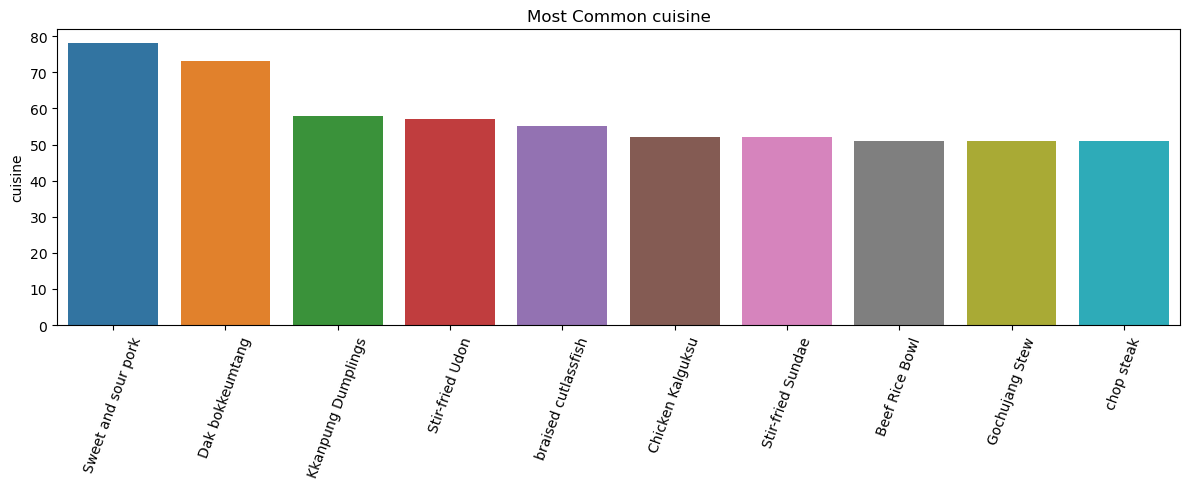

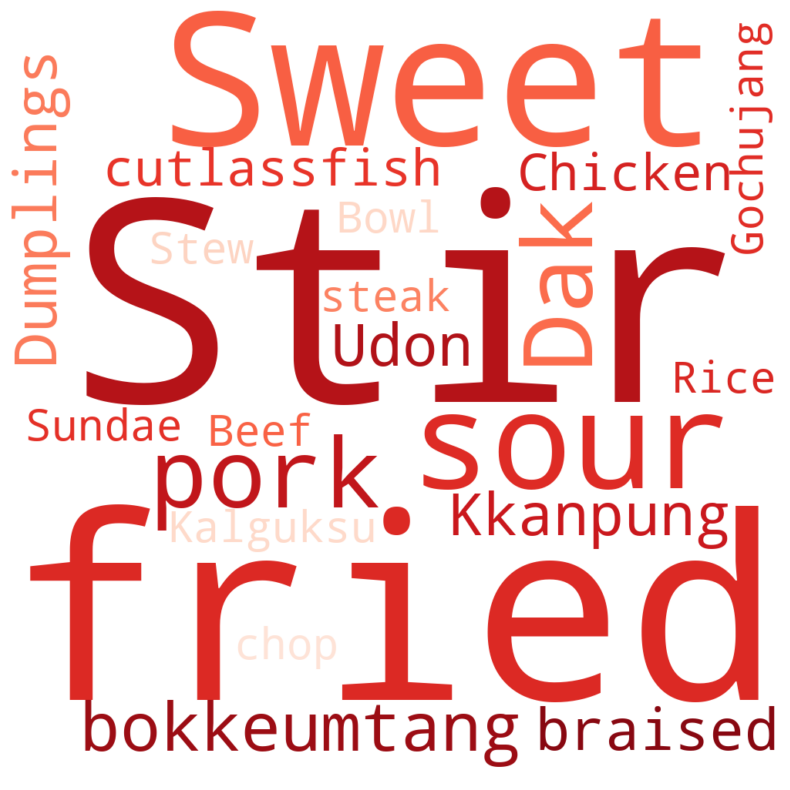

<AxesSubplot:ylabel='cuisine'>

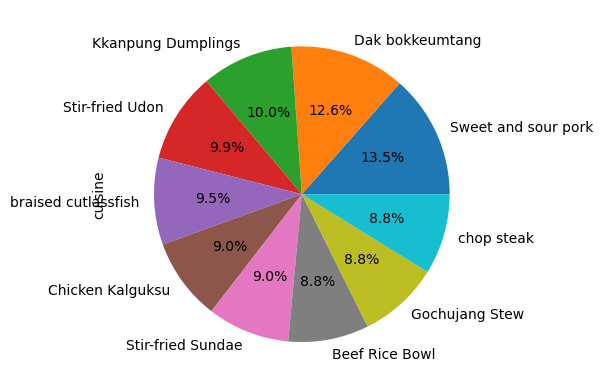

In [11]:
cuisine = df_ingredient.cuisine.value_counts()
top_10 = cuisine.head(10)
plt.figure(figsize=(12,5))
plt.title("Most Common cuisine")
sns.barplot(x=top_10.index,y=top_10)
plt.xticks(rotation=70)
plt.tight_layout()

# wordcloud
all_text_s0 = ' '.join(word for word in top_10.index)
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

# pie chart
df_ingredient['cuisine'].value_counts().head(10).plot.pie(autopct = '%1.1f%%',)

2. INGREDIENT

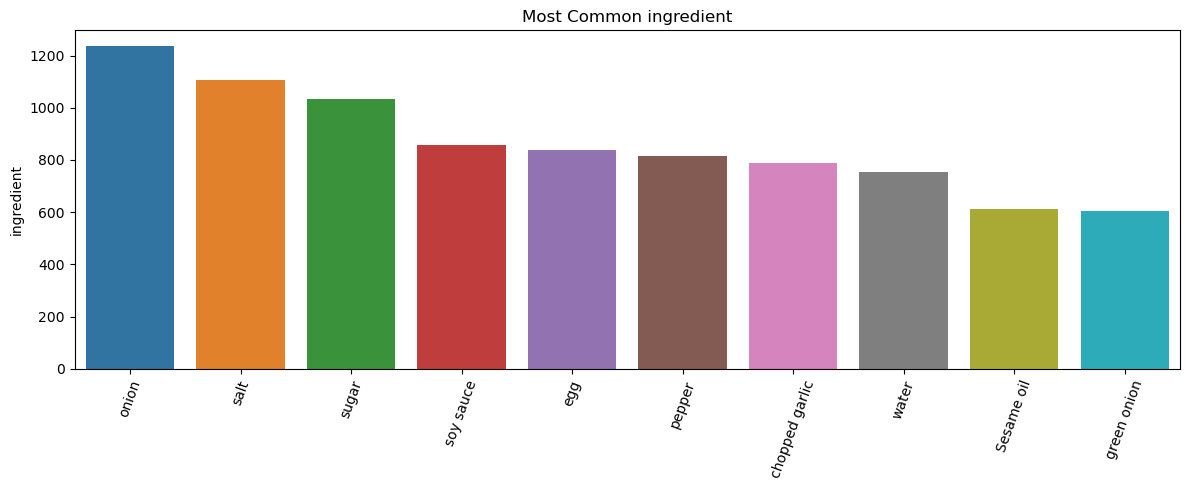

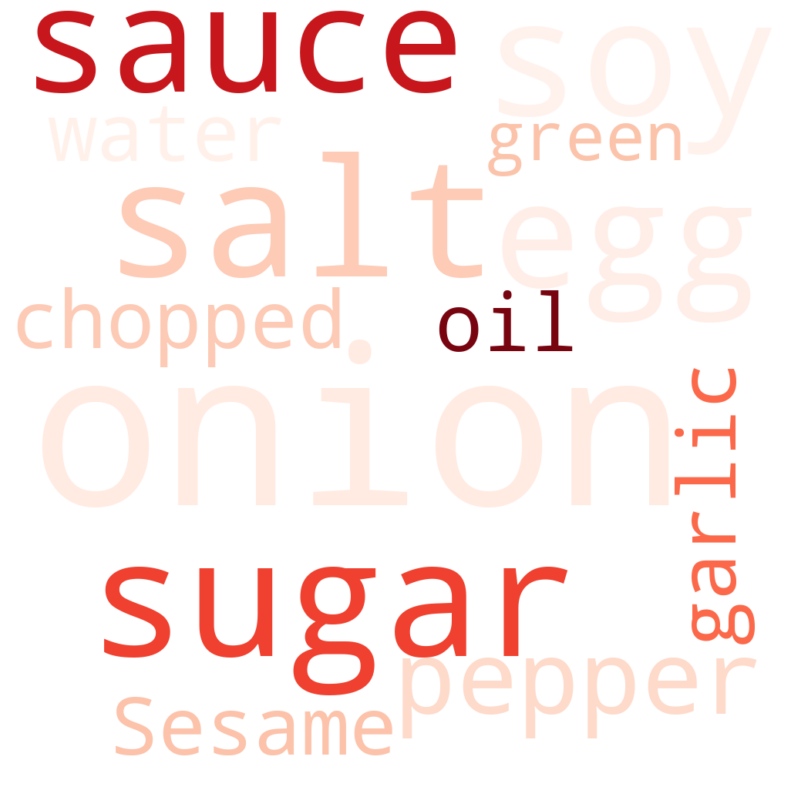

<AxesSubplot:ylabel='ingredient'>

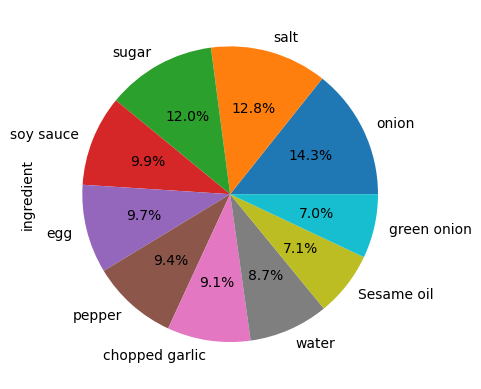

In [12]:
ingredient = df_ingredient.ingredient.value_counts()
top_10 = ingredient.head(10)
plt.figure(figsize=(12,5))
plt.title("Most Common ingredient")
sns.barplot(x=top_10.index,y=top_10)
plt.xticks(rotation=70)
plt.tight_layout()

# wordcloud
all_text_s0 = ' '.join(word for word in top_10.index)
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

# pie chart
df_ingredient['ingredient'].value_counts().head(10).plot.pie(autopct = '%1.1f%%',)

3. WEIGHT AFTER CONVERT

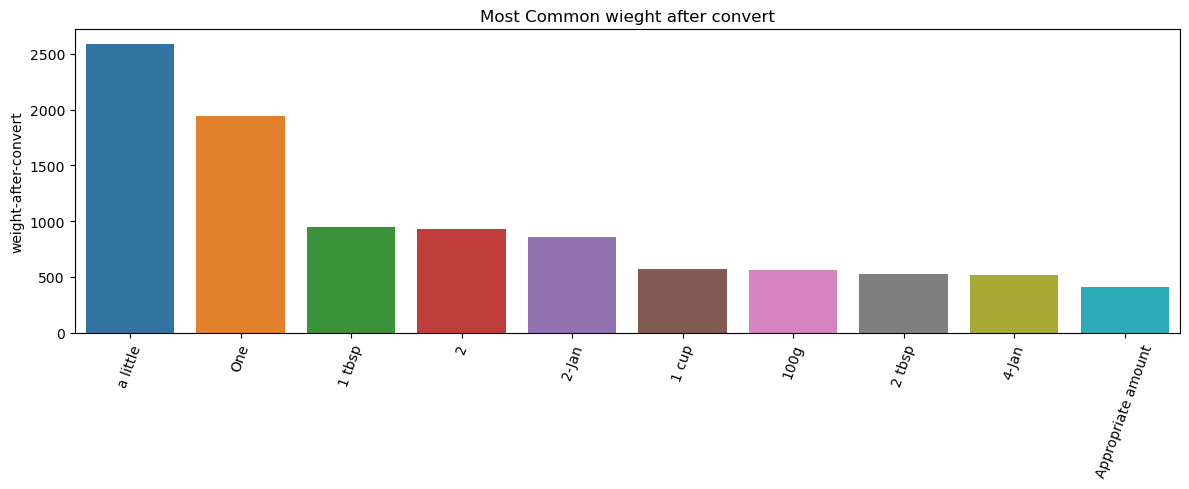

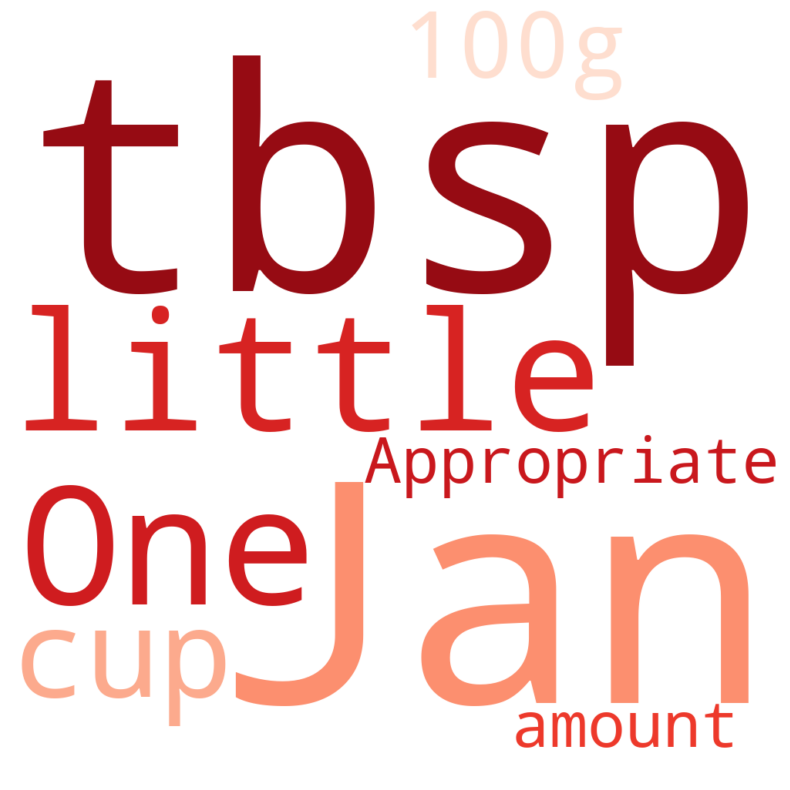

<AxesSubplot:ylabel='weight-after-convert'>

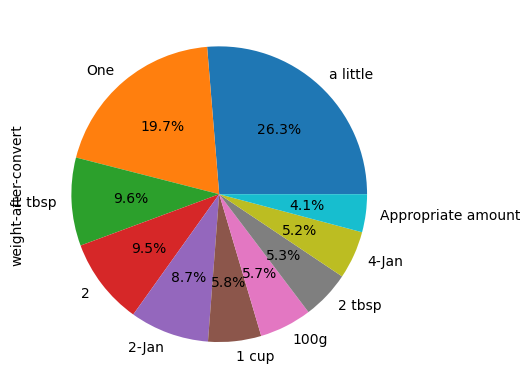

In [13]:
weightAfterConvert = df_ingredient['weight-after-convert'].value_counts()
top_10 = weightAfterConvert.head(10)
plt.figure(figsize=(12,5))
plt.title("Most Common wieght after convert")
sns.barplot(x=top_10.index,y=top_10)
plt.xticks(rotation=70)
plt.tight_layout()

# wordcloud
all_text_s0 = ' '.join(word for word in top_10.index)
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

# pie chart
df_ingredient['weight-after-convert'].value_counts().head(10).plot.pie(autopct = '%1.1f%%',)

## 4. WEIGHT REQUEST MAS REY

In [14]:
weight = df_ingredient['weight'].value_counts().rename_axis('weight_name').reset_index(name='total')
arr = []
arrTbspToGram = []
x=0
for i in df_ingredient['weight'] :
    x+=1
    if "tbsp" in i.lower() or "tablespoon" in i.lower() or "tablespoons" in i.lower():
        arr.append("tbsp")
        arrTbspToGram.append("gram")
    elif "cup" in i.lower():
        arr.append("cup")
        arrTbspToGram.append("cup")
    elif "jan" in i.lower():
        arr.append("jan")
        arrTbspToGram.append("jan")
    elif "teas" in i.lower() or "tsp" in i.lower():
        arr.append("teaspoons")
        arrTbspToGram.append("teaspoons")
    elif "spoon" in i.lower() :
        arr.append("tbsp")
        arrTbspToGram.append("tbsp")
    elif "egg" in i.lower():
        arr.append("eggs")
        arrTbspToGram.append("eggs")
    elif "grain" in i.lower():
        arr.append("grains")
        arrTbspToGram.append("grains")
    elif "page" in i.lower():
        arr.append("page")
        arrTbspToGram.append("page")
    elif "ml" in i.lower():
        arr.append("ml")
        arrTbspToGram.append("ml")
    elif "gram" in i.lower():
        arr.append("gram")
        arrTbspToGram.append("gram")
    elif "g" in i.lower() :
        iSplit = i.split(" ")
        if len(iSplit) == 1:
            find = re.findall(r"[+]?\d*\.?\d+|\d+", i)
            if len(find) >= 1 :
                arr.append("gram")
                arrTbspToGram.append("gram")
            else:
                arr.append(i)
                arrTbspToGram.append(i)
        elif len(iSplit) == 2 :
            if "about" in i.lower() or "handful" or "300g" in i.lower() or "1/3" in i.lower() or "180g" in i.lower() or "1 g" in i.lower() or "30g" in i.lower() or "10g" in i.lower() and "bag" not in i.lower() and "garlic" not in i.lower():
                arr.append("gram")
                arrTbspToGram.append("gram")
            else:
                arr.append(i)
                arrTbspToGram.append(i)
        elif len(iSplit) == 3:
            find = re.findall(r"[+]?\d*\.?\d+|\d+", i)
            if len(find) >= 1:
                if "(" in i.lower() or "100g" in i.lower() and "large" not in i.lower() and "1/2 bag" not in i.lower():
                    arr.append("gram")
                    arrTbspToGram.append("gram")
                else:
                    arr.append(i)
                    arrTbspToGram.append(i)
            else:
                arr.append(i)
                arrTbspToGram.append(i)
        elif len(iSplit) == 4:
            find = re.findall(r"[+]?\d*\.?\d+|\d+", i)
            if len(find) >= 1 :
                if "complex" not in i.lower() and "pieces" not in i.lower() and "liking" not in i.lower():
                    arr.append("gram")
                    arrTbspToGram.append("gram")
                else:
                    arr.append(i)
                    arrTbspToGram.append(i)
            else:
                arr.append(i)
                arrTbspToGram.append(i)
        elif "120g" in i.lower() or "50g" in i.lower() or "60 g" in i.lower() or "100g" in i.lower() :
            arr.append("gram")
            arrTbspToGram.append("gram")
        else:
            arr.append(i)
            arrTbspToGram.append(i)
    elif "chapter" in i.lower():
        arr.append("chapter")
        arrTbspToGram.append("chapter")
    elif "pieces" in i.lower() or "pcs" in i.lower():
        arr.append("pieces")
        arrTbspToGram.append("pieces")
    elif "zoom" in i.lower() or "pcs" in i.lower():
        arr.append("zoom")    
        arrTbspToGram.append("zoop")
    else:
        arr.append(i)
        arrTbspToGram.append(i)
arrDf = pd.DataFrame(arr)
arrTbspToGramDf = pd.DataFrame(arrTbspToGram)
print(arrDf.value_counts())
arrDf.value_counts().rename_axis('weight_name').reset_index(name='total').to_csv('arrDf.csv',index=False)
print("Number of unique weight: " + str(len(arrDf)))

tbsp                7486
gram                4386
a little            2590
cup                 2107
One                 1940
                    ... 
200o                   1
200cc                  1
200 sheets             1
20 to 30 tablets       1
3.5L                   1
Length: 783, dtype: int64
Number of unique weight: 32652


4.A. CUT INTEGER

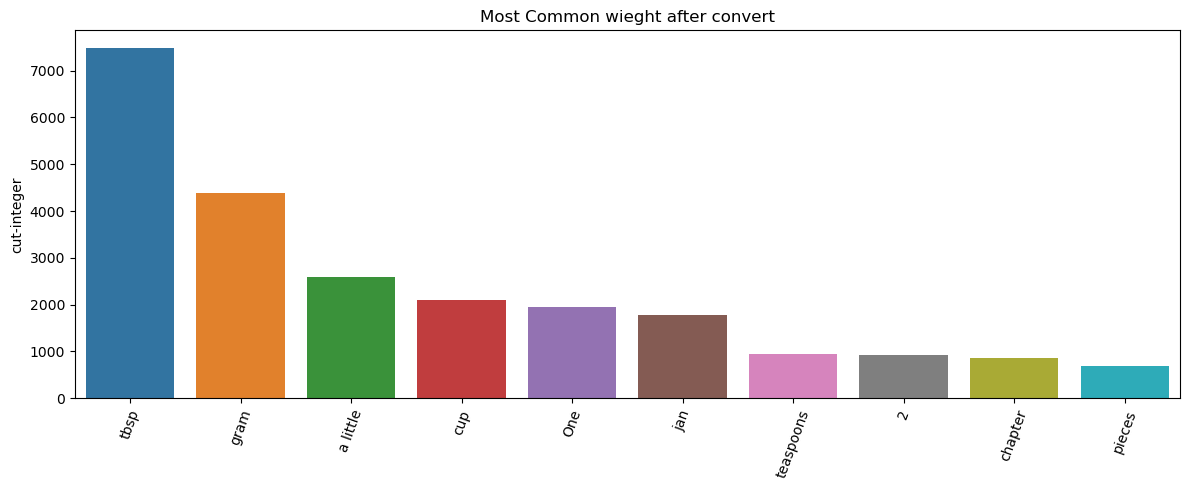

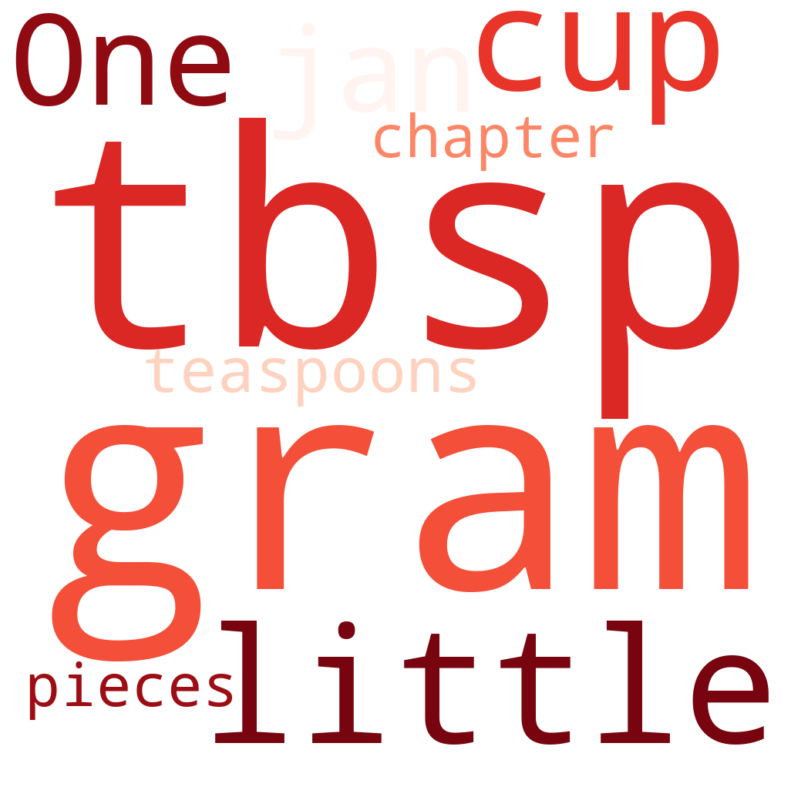

<AxesSubplot:ylabel='cut-integer'>

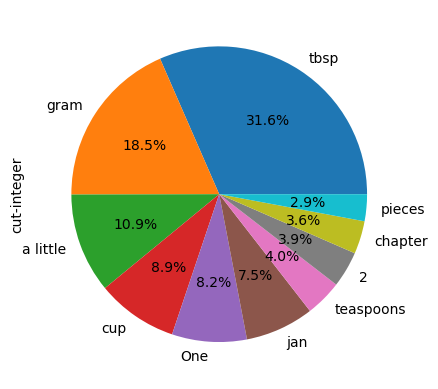

In [15]:
df_ingredient["cut-integer"] = arrDf
weightAfterConvert = df_ingredient["cut-integer"].value_counts()
top_10 = weightAfterConvert.head(10)
plt.figure(figsize=(12,5))
plt.title("Most Common wieght after convert")
sns.barplot(x=top_10.index,y=top_10)
plt.xticks(rotation=70)
plt.tight_layout()

# wordcloud
all_text_s0 = ' '.join(word for word in top_10.index)
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

# pie chart
df_ingredient['cut-integer'].value_counts().head(10).plot.pie(autopct = '%1.1f%%',)

4.B. TBSP TO GRAM

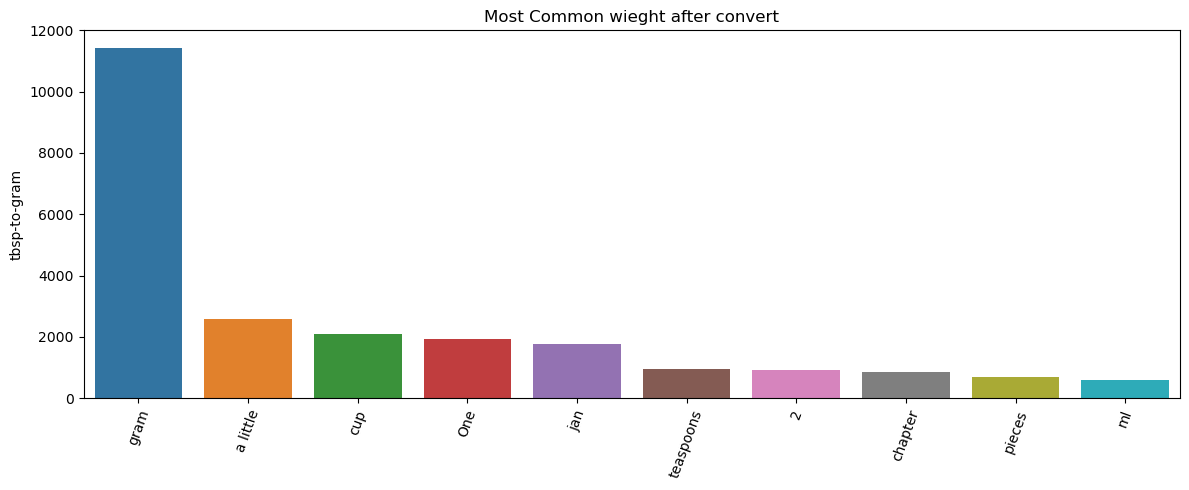

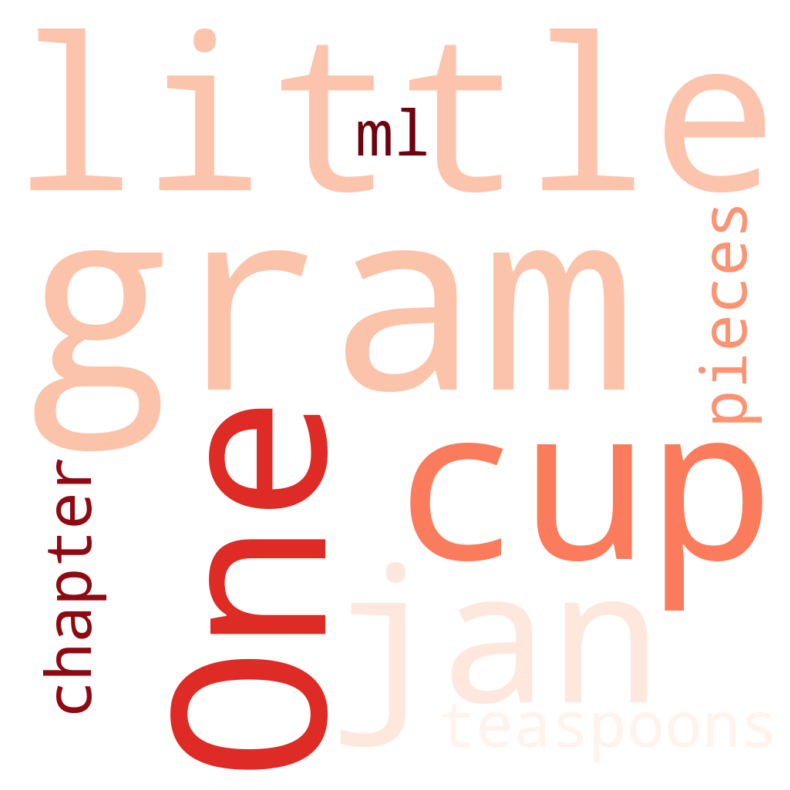

<AxesSubplot:ylabel='tbsp-to-gram'>

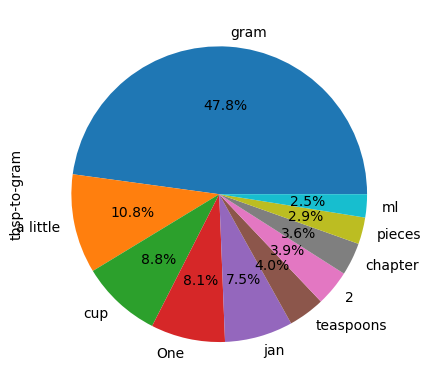

In [16]:
df_ingredient["tbsp-to-gram"] = arrTbspToGramDf
weightAfterConvert = df_ingredient["tbsp-to-gram"].value_counts()
top_10 = weightAfterConvert.head(10)
plt.figure(figsize=(12,5))
plt.title("Most Common wieght after convert")
sns.barplot(x=top_10.index,y=top_10)
plt.xticks(rotation=70)
plt.tight_layout()

# wordcloud
all_text_s0 = ' '.join(word for word in top_10.index)
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

# pie chart
df_ingredient['tbsp-to-gram'].value_counts().head(10).plot.pie(autopct = '%1.1f%%',)